In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import pickle

In [3]:
BnkDta = pd.read_csv('BankDataFinal.csv')

In [4]:
BnkDta.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,1,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,0


In [5]:
BnkDta.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000
mean,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,...,0.555838,0.160226,1.986110,5.164731e-16,3.071006e-15,5.871086e-17,1.254699e-14,-1.395813e-13,1.355739e-13,0.116985
std,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,...,0.496878,0.366820,0.770119,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-2.159994e+00,-3.081149e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-7.473845e-01,-4.237719e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,2.000000,-1.823406e-01,-3.002800e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,3.000000,6.652252e-01,2.158743e-02,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,3.000000,5.091402e+00,3.309478e+01,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,1.000000


In [6]:
BnkDta.isnull().sum()

job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month                  0
default                0
housing                0
loan                   0
day_interval           0
age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
dtype: int64

# Data Spliltting

In [7]:
X= BnkDta[BnkDta.columns.difference(['y'])]
print(X.columns)
y= BnkDta['y']

Index(['age', 'balance', 'campaign', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_interval', 'default', 'duration',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'month', 'pdays',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'previous'],
      dtype='object')


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 37)
(11303, 37)
(33908,)
(11303,)


# Data Modelling

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.90


In [11]:
preds_LR= logreg.predict(X_test)

In [12]:
preds_LR

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
roc_LR=roc_auc_score(y_test,preds_LR)
print(roc_LR)

0.6525816040572278


[[ 439  886]
 [ 261 9717]]


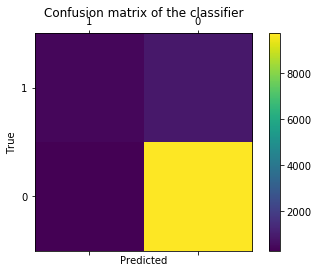

In [14]:
from sklearn.metrics import confusion_matrix

labels = [1,0]
cm = confusion_matrix(y_test, preds_LR, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
Dt_clf= DecisionTreeClassifier()
Dt_clf.fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(Dt_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(Dt_clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [17]:
preds_DT = Dt_clf.predict(X_test)

In [18]:
preds_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
roc_DT=roc_auc_score(y_test,preds_DT)
print(roc_DT)

0.7016922512546472


[[ 637  688]
 [ 772 9206]]


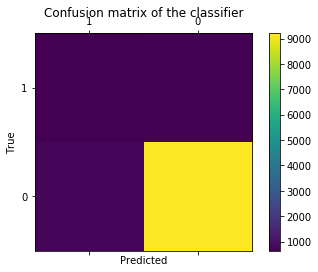

In [20]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_DT, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.89


In [22]:
preds_Knn = knn.predict(X_test)

In [23]:
preds_Knn

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
roc_Knn= roc_auc_score(y_test,preds_Knn)
print(roc_Knn)

0.6541094180782628


[[ 455  870]
 [ 351 9627]]


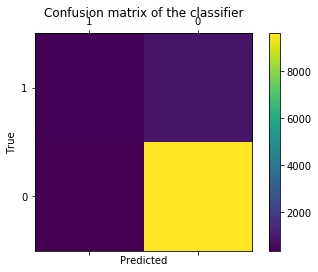

In [25]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_Knn, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.81


In [27]:
preds_NB = gnb.predict(X_test)

In [28]:
roc_NB = roc_auc_score(y_test, preds_NB)
print(roc_NB)

0.6998584054731731


[[ 732  593]
 [1524 8454]]


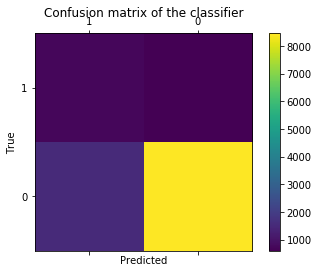

In [29]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_NB, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Support Vector Machine

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.90
Accuracy of SVM classifier on test set: 0.90


In [31]:
preds_svm = svm.predict(X_test)

In [32]:
roc_svm = roc_auc_score(y_test, preds_svm)
print(roc_svm)

0.6321244851881688


[[ 382  943]
 [ 240 9738]]


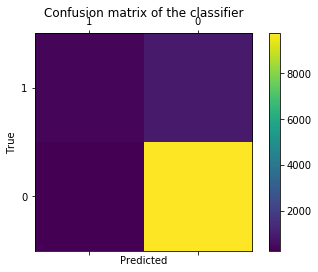

In [33]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_svm, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Neural Networks_Multi-layer Perceptron 

In [34]:
 from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2),random_state=1)

In [35]:
MLP.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
preds_MLP = MLP.predict(X_test)

In [37]:
print('Accuracy of ANN_MLP classifier on training set: {:.2f}'.format(MLP.score(X_train, y_train)))
print('Accuracy of ANN_MLP classifier on test set: {:.2f}'.format(MLP.score(X_test, y_test)))

Accuracy of ANN_MLP classifier on training set: 0.90
Accuracy of ANN_MLP classifier on test set: 0.90


In [38]:
roc_MLP = roc_auc_score(y_test,preds_MLP)
print(roc_MLP)

0.6553826342481762


[[ 452  873]
 [ 303 9675]]


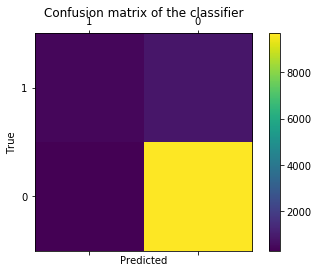

In [39]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_MLP, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Ensamble Methods

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [41]:
RF.fit(X_train, y_train)
print('Accuracy with Ensemble Methods classifier on training set: {:.2f}'.format(RF.score(X_train, y_train)))
print('Accuracy with Ensemble Methods classifier on test set: {:.2f}'.format(RF.score(X_test, y_test)))

Accuracy with Ensemble Methods classifier on training set: 0.99
Accuracy with Ensemble Methods classifier on test set: 0.89


In [42]:
preds_RF = RF.predict(X_test)

In [43]:
roc_RF = roc_auc_score(y_test,preds_RF)
print(roc_RF)

0.6573491870794994


[[ 460  865]
 [ 324 9654]]


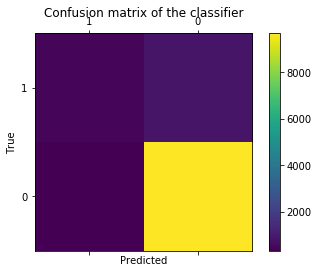

In [44]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_RF, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparing the accuracy of ML models

In [45]:
accuracy=[roc_LR ,roc_DT ,roc_Knn , roc_NB ,roc_svm, roc_MLP, roc_RF]
accuracy

[0.6525816040572278,
 0.7016922512546472,
 0.6541094180782628,
 0.6998584054731731,
 0.6321244851881688,
 0.6553826342481762,
 0.6573491870794994]

In [46]:
models= ["LR", "DT", "KNN", "NB", "SVM","ANN","RF"]
models

['LR', 'DT', 'KNN', 'NB', 'SVM', 'ANN', 'RF']

In [47]:
d = {'model': models,'accuracy': accuracy}

In [48]:
Performane = pd.DataFrame(data=d)
Performane

,model,accuracy
0,LR,0.652582
1,DT,0.701692
2,KNN,0.654109
3,NB,0.699858
4,SVM,0.632124
5,ANN,0.655383
6,RF,0.657349


Text(0.5,1,'Comparing the Accuracy of Different ML Models')

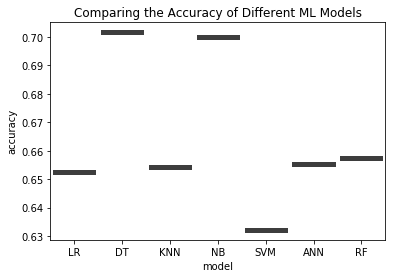

In [49]:
ax=sns.boxplot(x='model', y='accuracy', data=Performane,linewidth=5)
ax.set_title("Comparing the Accuracy of Different ML Models")

# Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [50]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.10286005 0.10212236 0.06215065 0.01142114 0.00425667 0.01062455
 0.04533133 0.00339735 0.2511907  0.00736123 0.01104516 0.00982675
 0.00521119 0.02308044 0.00934539 0.00833536 0.00453821 0.00398184
 0.01015717 0.00674942 0.00555241 0.00653757 0.00520921 0.01034097
 0.00537805 0.00174937 0.01271786 0.00704159 0.00791893 0.00768528
 0.09706723 0.02702494 0.0101579  0.00772244 0.05779747 0.0162916
 0.02082022]


# Comparing Different Feature-selection Techniques

In [51]:
from __future__ import print_function, division
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, f_classif, RFE
print(__doc__)

Automatically created module for IPython interactive environment


# Univariate Selection

We can take advantage of some common statistical tests to select those features that may have an important impact on the prediction process! In this section, " ANOVA F-value" is employed to select the best features from the dataset. 

In [52]:
# feature extraction
tst = SelectKBest(score_func= f_classif, k=30)
fit = tst.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.547e+01 1.000e+02 1.891e+02 6.532e+02 5.464e+00 8.034e+02 7.630e+00
 1.864e+01 6.328e+03 4.896e+01 4.011e+01 1.374e+02 2.968e+00 6.944e+02
 2.335e+00 1.730e+02 1.434e+01 1.332e+01 3.018e+01 1.895e+02 7.925e-02
 2.701e+01 1.832e+02 2.042e+00 3.132e+01 7.261e-01 1.711e+02 1.721e+00
 1.376e+02 1.396e+02 1.439e+01 3.302e+02 2.432e+00 1.847e+01 3.654e+03
 9.213e+02 2.531e+02]
[[ 1.607  0.256 -0.569  0.     0.     1.     1.     0.     0.011  0.
   0.     1.     1.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     1.     0.     5.    -0.411  0.     0.     1.    -0.252]
 [ 0.289 -0.438 -0.569  0.     0.     1.     1.     0.    -0.416  0.
   1.     0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.     5.    -0.411  0.     0.     1.    -0.252]
 [-0.747 -0.447 -0.569  0.     0.     1.     1.     0.    -0.707  0.
   1.     0.     1.     0.     1.     0.     0.     0.     0.     0.
   0.     1.     1.     0.     5.    -0.411  0.     0.     1.  

# Recursive Feature Elimination

The Recursive Feature Elimination (RFE) works by recursively removing attributes and building a model on those attributes that remain. In this section, we use Decision Tree algorithm to select the most important features.

In [53]:
# feature extraction
model = DecisionTreeClassifier()
rfe = RFE(model, 30)
fit = rfe.fit(X, y)

print("Num Features: %d" % (fit.n_features_,))
#print(X.columns)
print("Selected Features: %s" % (fit.support_,))
print("Feature Ranking: %s" % (fit.ranking_,))
dic = {'Feature': X.columns ,'Rank':fit.ranking_ }
#Feature_RNK= pd.DataFrame(data=dic)

Num Features: 30
Selected Features: [ True  True  True  True False  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True  True  True  True False False  True False
  True]
Feature Ranking: [1 1 1 1 3 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 7 1 1 1 1 1 1 2 4 1 8 1]


In [54]:
Feature_RNK= pd.DataFrame(data=dic)
Feature_RNK

,Feature,Rank
0,age,1
1,balance,1
2,campaign,1
3,contact_cellular,1
4,contact_telephone,3
5,contact_unknown,1
6,day_interval,1
7,default,6
8,duration,1
9,education_primary,1


# Principal Component Analysis

Principal Component Analysis (PCA) uses linear algebra to transform the dataset into a compressed form!

In [55]:
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train)
# summarize components
print("number of selected PCA componens: %s" % (pca.n_components_,))
#print(fit.components_)

number of selected PCA componens: 16


In [56]:
#Apply the mapping (transform) to both the training set and the test set
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [57]:
## Apply Logistic Regression to the Transformed Data
logReg = LogisticRegression(solver = 'lbfgs')

In [58]:
logReg.fit(X_train_PCA,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
X_test_PCA.shape

(11303, 16)

In [60]:
pred_LR_PCA = logReg.predict(X_test_PCA)

In [61]:
roc_LR_PCA= roc_auc_score(y_test,pred_LR_PCA)
print(roc_LR_PCA)

0.5977552124106998


In [62]:
logReg.score(X_test_PCA, y_test)

0.8889675307440502

In [98]:
def pip(classifier):
    pipe = Pipeline([
        ('reduce_dim', PCA()),
        ('classify', classifier )
    ])
    return(pipe)

N_FEATURES_OPTIONS = [10, 20, 30]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = {'reduce_dim': [PCA(), NMF()],
              'reduce_dim__n_components': N_FEATURES_OPTIONS,
              'classify__C': C_OPTIONS}

grid = GridSearchCV(pip(LinearSVC()), n_jobs=2, param_grid=param_grid)


In [95]:
grid.fit(X_train, y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000164BAAC7C00, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000164BAAC7C00, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(892, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(892, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (892, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=892, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 21, 3, 22, 12, 891231, tzinfo=tzutc()), 'msg_id': '4766458a80734408b52ba0742260b43b', 'msg_type': 'execute_request', 'session': '6b1367deff3f4b919bbd7e9a9e72c2d4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '4766458a80734408b52ba0742260b43b', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'6b1367deff3f4b919bbd7e9a9e72c2d4']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 21, 3, 22, 12, 891231, tzinfo=tzutc()), 'msg_id': '4766458a80734408b52ba0742260b43b', 'msg_type': 'execute_request', 'session': '6b1367deff3f4b919bbd7e9a9e72c2d4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '4766458a80734408b52ba0742260b43b', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'6b1367deff3f4b919bbd7e9a9e72c2d4'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 21, 3, 22, 12, 891231, tzinfo=tzutc()), 'msg_id': '4766458a80734408b52ba0742260b43b', 'msg_type': 'execute_request', 'session': '6b1367deff3f4b919bbd7e9a9e72c2d4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '4766458a80734408b52ba0742260b43b', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='grid.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'grid.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('grid.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('grid.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'grid.fit(X_train, y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-95-3949096c802a>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 164c6adb048, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000164C6B0CC00, file "<ipython-input-95-3949096c802a>", line 1>
        result = <ExecutionResult object at 164c6adb048, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000164C6B0CC00, file "<ipython-input-95-3949096c802a>", line 1>, result=<ExecutionResult object at 164c6adb048, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000164C6B0CC00, file "<ipython-input-95-3949096c802a>", line 1>
        self.user_global_ns = {'BnkDta':        job_admin.  job_blue-collar  job_entrepre....476138  4.523577  0  

[45211 rows x 38 columns], 'C_OPTIONS': [1, 10, 100, 1000], 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Dt_clf': DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'Feature_RNK':                 Feature  Rank
0                 ...tcome_unknown     8
36             previous     1, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'preds_NB = gnb.predict(X_test)', "import pandas as pd\nimport numpy as np\nimport se...s\nwarnings.filterwarnings('ignore')\nimport pickle", "BnkDta = pd.read_csv('BankDataFinal.csv')", 'BnkDta.head()', 'BnkDta.describe()', 'BnkDta.isnull().sum()', "X= BnkDta[BnkDta.columns.difference(['y'])]\nprint(X.columns)\ny= BnkDta['y']", 'from sklearn.model_selection import train_test_s...t.shape)\nprint(y_train.shape)\nprint(y_test.shape)', 'from sklearn.linear_model import LogisticRegression', "logreg = LogisticRegression()\nlogreg.fit(X_train...et: {:.2f}'.format(logreg.score(X_test, y_test)))", 'preds_LR= logreg.predict(X_test)', 'preds_LR', 'roc_LR=roc_auc_score(y_test,preds_LR)\nprint(roc_LR)', "from sklearn.metrics import confusion_matrix\n\nla...xlabel('Predicted')\nplt.ylabel('True')\nplt.show()", 'from sklearn.tree import DecisionTreeClassifier', "Dt_clf= DecisionTreeClassifier()\nDt_clf.fit(X_tr...et: {:.2f}'.format(Dt_clf.score(X_test, y_test)))", 'preds_DT = Dt_clf.predict(X_test)', 'preds_DT', 'roc_DT=roc_auc_score(y_test,preds_DT)\nprint(roc_DT)', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, ...}
        self.user_ns = {'BnkDta':        job_admin.  job_blue-collar  job_entrepre....476138  4.523577  0  

[45211 rows x 38 columns], 'C_OPTIONS': [1, 10, 100, 1000], 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Dt_clf': DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'Feature_RNK':                 Feature  Rank
0                 ...tcome_unknown     8
36             previous     1, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'preds_NB = gnb.predict(X_test)', "import pandas as pd\nimport numpy as np\nimport se...s\nwarnings.filterwarnings('ignore')\nimport pickle", "BnkDta = pd.read_csv('BankDataFinal.csv')", 'BnkDta.head()', 'BnkDta.describe()', 'BnkDta.isnull().sum()', "X= BnkDta[BnkDta.columns.difference(['y'])]\nprint(X.columns)\ny= BnkDta['y']", 'from sklearn.model_selection import train_test_s...t.shape)\nprint(y_train.shape)\nprint(y_test.shape)', 'from sklearn.linear_model import LogisticRegression', "logreg = LogisticRegression()\nlogreg.fit(X_train...et: {:.2f}'.format(logreg.score(X_test, y_test)))", 'preds_LR= logreg.predict(X_test)', 'preds_LR', 'roc_LR=roc_auc_score(y_test,preds_LR)\nprint(roc_LR)', "from sklearn.metrics import confusion_matrix\n\nla...xlabel('Predicted')\nplt.ylabel('True')\nplt.show()", 'from sklearn.tree import DecisionTreeClassifier', "Dt_clf= DecisionTreeClassifier()\nDt_clf.fit(X_tr...et: {:.2f}'.format(Dt_clf.score(X_test, y_test)))", 'preds_DT = Dt_clf.predict(X_test)', 'preds_DT', 'roc_DT=roc_auc_score(y_test,preds_DT)\nprint(roc_DT)', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\KBrig\BankMarketing\BankMarketing\<ipython-input-95-3949096c802a> in <module>()
----> 1 grid.fit(X_train, y_train)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=            age   balance  campaign  contact_cel...         1 -0.251940  

[33908 rows x 37 columns], y=33362    0
28229    0
37952    0
43408    1
9897...0
2732     0
Name: y, Length: 33908, dtype: int64, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =             age   balance  campaign  contact_cel...         1 -0.251940  

[33908 rows x 37 columns]
        y = 33362    0
28229    0
37952    0
43408    1
9897...0
2732     0
Name: y, Length: 33908, dtype: int64
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Dec 20 22:22:29 2018
PID: 12500Python 3.7.0: C:\Users\KBrig\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('reduce_dim',...random_state=None, tol=0.0001,
     verbose=0))]),             age   balance  campaign    ...     p...           1 -0.251940

[33908 rows x 37 columns], 33362    0
28229    0
37952    0
43408    1
9897...0
2732     0
Name: y, Length: 33908, dtype: int64, {'score': <function _passthrough_scorer>}, array([11295, 11296, 11297, ..., 33905, 33906, 33907]), array([    0,     1,     2, ..., 11372, 11384, 11392]), 0, {'classify__C': 1, 'reduce_dim': NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), 'reduce_dim__n_components': 10}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('reduce_dim',...random_state=None, tol=0.0001,
     verbose=0))]),             age   balance  campaign    ...     p...           1 -0.251940

[33908 rows x 37 columns], 33362    0
28229    0
37952    0
43408    1
9897...0
2732     0
Name: y, Length: 33908, dtype: int64, {'score': <function _passthrough_scorer>}, array([11295, 11296, 11297, ..., 33905, 33906, 33907]), array([    0,     1,     2, ..., 11372, 11384, 11392]), 0, {'classify__C': 1, 'reduce_dim': NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), 'reduce_dim__n_components': 10})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('reduce_dim',...random_state=None, tol=0.0001,
     verbose=0))]), X=            age   balance  campaign    ...     p...           1 -0.251940

[33908 rows x 37 columns], y=33362    0
28229    0
37952    0
43408    1
9897...0
2732     0
Name: y, Length: 33908, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([11295, 11296, 11297, ..., 33905, 33906, 33907]), test=array([    0,     1,     2, ..., 11372, 11384, 11392]), verbose=0, parameters={'classify__C': 1, 'reduce_dim': NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), 'reduce_dim__n_components': 10}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(memory=No...andom_state=None, tol=0.0001,
     verbose=0))])>
        X_train =             age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns]
        y_train = 465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py in fit(self=Pipeline(memory=None,
     steps=[('reduce_dim',...random_state=None, tol=0.0001,
     verbose=0))]), X=            age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns], y=465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64, **fit_params={})
    243         Returns
    244         -------
    245         self : Pipeline
    246             This estimator
    247         """
--> 248         Xt, fit_params = self._fit(X, y, **fit_params)
        Xt = undefined
        fit_params = {}
        self._fit = <bound method Pipeline._fit of Pipeline(memory=N...andom_state=None, tol=0.0001,
     verbose=0))])>
        X =             age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns]
        y = 465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64
    249         if self._final_estimator is not None:
    250             self._final_estimator.fit(Xt, y, **fit_params)
    251         return self
    252 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py in _fit(self=Pipeline(memory=None,
     steps=[('reduce_dim',...random_state=None, tol=0.0001,
     verbose=0))]), X=            age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns], y=465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64, **fit_params={})
    208                 else:
    209                     cloned_transformer = clone(transformer)
    210                 # Fit or load from cache the current transfomer
    211                 Xt, fitted_transformer = fit_transform_one_cached(
    212                     cloned_transformer, None, Xt, y,
--> 213                     **fit_params_steps[name])
        fit_params_steps = {'classify': {}, 'reduce_dim': {}}
        name = 'reduce_dim'
    214                 # Replace the transformer of the step with the fitted
    215                 # transformer. This is necessary when loading the transformer
    216                 # from the cache.
    217                 self.steps[step_idx] = (name, fitted_transformer)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\memory.py in __call__(self=NotMemorizedFunc(func=<function _fit_transform_one at 0x00000192A92268C8>), *args=(NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), None,             age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns], 465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64), **kwargs={})
    357     # Should be a light as possible (for speed)
    358     def __init__(self, func):
    359         self.func = func
    360 
    361     def __call__(self, *args, **kwargs):
--> 362         return self.func(*args, **kwargs)
        self.func = <function _fit_transform_one>
        args = (NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), None,             age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns], 465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64)
        kwargs = {}
    363 
    364     def call_and_shelve(self, *args, **kwargs):
    365         return NotMemorizedResult(self.func(*args, **kwargs))
    366 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py in _fit_transform_one(transformer=NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), weight=None, X=            age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns], y=465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64, **fit_params={})
    576 
    577 
    578 def _fit_transform_one(transformer, weight, X, y,
    579                        **fit_params):
    580     if hasattr(transformer, 'fit_transform'):
--> 581         res = transformer.fit_transform(X, y, **fit_params)
        res = undefined
        transformer.fit_transform = <bound method NMF.fit_transform of NMF(alpha=0.0...fle=False, solver='cd',
  tol=0.0001, verbose=0)>
        X =             age   balance  campaign    ...     p...           1 -0.251940

[22604 rows x 37 columns]
        y = 465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64
        fit_params = {}
    582     else:
    583         res = transformer.fit(X, y, **fit_params).transform(X)
    584     # if we have a weight for this transformer, multiply output
    585     if weight is None:

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\nmf.py in fit_transform(self=NMF(alpha=0.0, beta_loss='frobenius', init=None,...ffle=False, solver='cd',
  tol=0.0001, verbose=0), X=array([[ 1.51279098,  0.09121589,  0.39902023, ....  0.        ,
         1.        , -0.25194037]]), y=465      0
34596    0
2664     0
27308    0
4470...0
2732     0
Name: y, Length: 22604, dtype: int64, W=None, H=None)
   1230             X=X, W=W, H=H, n_components=self.n_components, init=self.init,
   1231             update_H=True, solver=self.solver, beta_loss=self.beta_loss,
   1232             tol=self.tol, max_iter=self.max_iter, alpha=self.alpha,
   1233             l1_ratio=self.l1_ratio, regularization='both',
   1234             random_state=self.random_state, verbose=self.verbose,
-> 1235             shuffle=self.shuffle)
        self.shuffle = False
   1236 
   1237         self.reconstruction_err_ = _beta_divergence(X, W, H, self.beta_loss,
   1238                                                     square_root=True)
   1239 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\nmf.py in non_negative_factorization(X=array([[ 1.51279098,  0.09121589,  0.39902023, ....  0.        ,
         1.        , -0.25194037]]), W=None, H=None, n_components=10, init=None, update_H=True, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, alpha=0.0, l1_ratio=0.0, regularization='both', random_state=None, verbose=0, shuffle=False)
    970     Fevotte, C., & Idier, J. (2011). Algorithms for nonnegative matrix
    971     factorization with the beta-divergence. Neural Computation, 23(9).
    972     """
    973 
    974     X = check_array(X, accept_sparse=('csr', 'csc'), dtype=float)
--> 975     check_non_negative(X, "NMF (input X)")
        X = array([[ 1.51279098,  0.09121589,  0.39902023, ....  0.        ,
         1.        , -0.25194037]])
    976     beta_loss = _check_string_param(solver, regularization, beta_loss, init)
    977 
    978     if safe_min(X) == 0 and beta_loss <= 0:
    979         raise ValueError("When beta_loss <= 0 and X contains zeros, "

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py in check_non_negative(X=array([[ 1.51279098,  0.09121589,  0.39902023, ....  0.        ,
         1.        , -0.25194037]]), whom='NMF (input X)')
    780     whom : string
    781         Who passed X to this function.
    782     """
    783     X = X.data if sp.issparse(X) else X
    784     if (X < 0).any():
--> 785         raise ValueError("Negative values in data passed to %s" % whom)
        whom = 'NMF (input X)'

ValueError: Negative values in data passed to NMF (input X)
___________________________________________________________________________

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_